In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from scipy.stats import entropy
import pywt
#import imblearn
#from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statistics
from scipy.fft import fft, fftfreq, ifft, fftshift
from scipy import signal
import scipy
import matplotlib.pyplot as plt
import pywt
import numpy as np
import scipy.signal as sig
from sklearn import svm
from scipy.stats import moment
def hilphase(y1,y2):
    sig1_hill=sig.hilbert(y1)
    sig2_hill=sig.hilbert(y2)
    pdt=(np.inner(sig1_hill,np.conj(sig2_hill))/(np.sqrt(np.inner(sig1_hill,
               np.conj(sig1_hill))*np.inner(sig2_hill,np.conj(sig2_hill)))))
    phase = np.angle(pdt)

    return phase
def ft_median(fs,x):
        f, Pxx = scipy.signal.periodogram(x, fs= fs)
        sum = np.trapz(Pxx, f)
        for i in range(f.shape[0]):
            temp = np.trapz(Pxx[:i], f[:i])
            if temp > sum / 2:
                break
        return f[i]

In [4]:
mat = loadmat('TrainData2')
df = pd.DataFrame(np.array(mat['TrainData2']))
df


,0,1,2,3,4,5,6,7,8,9,...,65492,65493,65494,65495,65496,65497,65498,65499,65500,65501
0,0.000000,0.003906,0.007812,0.011719,0.015625,0.019531,0.023438,0.027344,0.031250,0.035156,...,255.828125,255.832031,255.835938,255.839844,255.843750,255.847656,255.851562,255.855469,255.859375,255.863281
1,-0.959802,-6.041497,-0.757061,10.439707,15.041082,7.120264,-4.653308,-7.190089,1.950591,12.478496,...,-171.268372,-166.036894,-162.108902,-165.253727,-173.177785,-176.302236,-170.437255,-160.651718,-153.283217,-149.494511
2,-5.674193,-4.172625,3.938735,8.979217,4.538571,-4.823300,-8.826988,-3.960941,2.429959,1.812735,...,-89.539915,-90.200345,-88.333356,-85.844335,-85.858981,-87.673959,-88.311896,-84.147453,-73.167167,-60.064154
3,4.258052,1.337806,3.530029,12.127596,21.408394,24.287835,20.493102,16.490852,17.474668,22.242638,...,-67.554756,-84.706779,-97.675972,-94.358345,-79.403249,-67.459356,-68.309680,-73.897122,-66.596371,-42.397042
4,11.803294,11.440646,0.974278,-6.468379,-1.724912,10.119789,16.343823,10.667252,0.024270,-3.427978,...,-62.149198,-73.119078,-80.748873,-76.223155,-63.791229,-54.893090,-56.296564,-60.564116,-53.732158,-33.898594
5,9.452659,8.242515,0.335694,-4.026765,0.853501,10.042497,13.849033,8.353203,0.340693,-0.268114,...,-68.764833,-69.277159,-71.366661,-68.427004,-60.510026,-53.331457,-51.125488,-48.919945,-37.782690,-19.652319
6,6.449050,-3.807366,-16.125549,-19.386412,-13.953791,-9.962804,-15.094097,-26.190870,-32.322097,-26.245700,...,-69.922003,-79.767833,-84.968538,-86.790094,-86.201026,-81.174247,-70.892855,-55.684701,-37.082085,-19.965544
7,0.221562,-1.216279,5.121540,15.483341,22.101327,21.839327,19.695324,21.138430,25.639046,28.845430,...,-44.040810,-46.872765,-48.335620,-51.381350,-55.236764,-54.866748,-47.331717,-34.006778,-19.439425,-9.240729
8,-3.227058,-5.613616,3.145276,15.550447,20.428515,15.114813,9.208400,12.323876,22.568615,29.761390,...,-30.094373,-24.452023,-23.941852,-25.497446,-21.791837,-9.830788,2.838734,9.182685,12.010615,18.367959
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
def fe(df):
    X = []
    for i in np.argwhere(df.to_numpy()[9] != 0).reshape(-1,4)[:,0]:
        row = np.array([])
        x = df.iloc[1:9,i-28:i+100].to_numpy()
        xf = abs(fft(x))[:,:64]
        #for j in range(1,37):
            #row = np.append(row,int(df.iloc[9,i]==j))
        row = np.append(row,x.flatten())
        row = np.append(row,x.mean(axis=1))
        row = np.append(row,x.var(axis=1))
        row = np.append(row,np.corrcoef(x)[np.triu_indices(8,k=1)])
        row = np.append(row,xf.flatten())
        row = np.append(row,np.corrcoef(xf)[np.triu_indices(8,k=1)])
        row = np.append(row,xf.mean(axis=1))
        row = np.append(row,xf.var(axis=1))
        row = np.append(row,xf.max(axis=1))
        row = np.append(row,xf.min(axis=1))
        row = np.append(row,(x**2).sum(axis=1))
        row = np.append(row,(xf**2).flatten())
        row = np.append(row,np.argmin(xf,axis=1))
        row = np.append(row,np.argmax(xf,axis=1))
        row = np.append(row,pywt.dwt(x, 'db1')[1])
        row = np.append(row,pywt.dwt(x, 'db1')[0])
        row = np.append(row,pywt.dwt(pywt.dwt(x, 'db1')[1],'db1')[0])
        row = np.append(row,pywt.dwt(pywt.dwt(x, 'db1')[1],'db1')[1])
        row = np.append(row,pywt.dwt(pywt.dwt(pywt.dwt(x, 'db1')[1],'db1')[1],'db1')[0])
        row = np.append(row,pywt.dwt(pywt.dwt(pywt.dwt(x, 'db1')[1],'db1')[1],'db1')[1])
        row = np.append(row,pywt.dwt(pywt.dwt(pywt.dwt(pywt.dwt(x, 'db1')[1],'db1')[1],'db1')[1],'db1')[0])  
        row = np.append(row,pywt.dwt(pywt.dwt(pywt.dwt(pywt.dwt(x, 'db1')[1],'db1')[1],'db1')[1],'db1')[1]) 
        #row = np.append(row,statistics.median(abs(fft(x))**2))
        #row = np.append(row,xf*np.arange(64).sum(axis=1))
        for i in range(8):
            for j in range(7,i,-1):
                #print(i,j)
                row = np.append(row,hilphase(x[i],x[j]))
        x1 = x
        for x in x:
            row = np.append(row,ft_median(256,x))
        
        for xf in xf:
            row = np.append(row,(xf*np.arange(64)).sum())
        row = np.append(row,moment(x1, moment=4,axis = 1))
        row = np.append(row,moment(x1, moment=3,axis = 1))
        X.append(row)
    X = np.array(X)
    return X

def J(X,y,n):
    J = np.array([])
    for i in range(len(X.T)):
        n1 = (y==0).sum()
        n2 = (y==1).sum()
        u1 = X.T[i][y==0].mean()
        u2 = X.T[i][y==1].mean()
        u0 = X.T[i].mean()
        var1 = X.T[i][y==0].var()
        var2 = X.T[i][y==1].var()
        J = np.append(J,(n1*(u1-u0)**2+n2*(u2-u0)**2)/(n1*var1+n2*var2))
    arg = np.argsort(J)[-n:]
    return arg


In [6]:
X = fe(df)
y = df.iloc[10,np.argwhere(df.to_numpy()[9] != 0).reshape(-1,4)[:,0]].to_numpy()
X

array([[-4.60451994e+00,  9.27965884e-01,  4.27538696e+00, ...,
        -4.23597304e+02, -1.86515097e+03, -6.09409860e+02],
       [-6.63572212e+00, -9.47300940e+00, -2.11566442e+00, ...,
        -1.77583322e+00, -1.04587462e+03, -5.59120479e+02],
       [-8.55092425e+00, -1.20838593e+01, -8.13630470e+00, ...,
        -3.08806316e+02, -1.53019951e+03, -1.04145351e+03],
       ...,
       [-2.75729985e+00, -3.40300049e+00,  1.16959919e+00, ...,
         2.35588371e+02, -1.11226157e+02, -1.62554754e+02],
       [-1.64678642e+00, -1.03964042e+01, -1.79168845e+01, ...,
        -2.14493817e+02,  8.68349519e+01, -5.39963271e+01],
       [ 2.41521616e+00,  3.39762144e+00,  7.05024650e+00, ...,
        -3.10568180e+02,  5.77590778e+01, -2.66382189e+02]])

In [18]:
arg = J(X,y,40)
X_new = X[:,arg]
#X_new = X
X_new
print(arg)

[ 628  242  494  500 3175  971 3191  365  371 2870 3002  969  240 2938
  627  622  497  366 3173  370  241  369  970 2873 2808  368  367 2935
  626 2871  495 3001 2872 2936 2999  496  623  625  624 3000]


In [19]:
#### LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size=0.3, random_state=0)
#oversample = RandomOverSampler(sampling_strategy='minority')
#x_train, y_train = oversample.fit_resample(x_train, y_train)
scaler = preprocessing.StandardScaler().fit(x_train)

Xtrain2 = scaler.transform(x_train)
Xtest2 = scaler.transform(x_test)

logistic = LogisticRegression(solver='newton-cg',class_weight={0:1,1:35})
logistic.fit(Xtrain2,y_train)
#class_weight={0:75,1:2625},

yhat_train = logistic.predict(Xtrain2)
yhat_test = logistic.predict(Xtest2)

err_train = 100*(yhat_train  != y_train).mean()
err_test = 100*(yhat_test != y_test).mean()

print('test error = ' , err_test , '%')
print('training error = ' , err_train , '%')

test error =  18.14814814814815 %
training error =  17.40740740740741 %


In [20]:
print(confusion_matrix(y_train,yhat_train))
print(confusion_matrix(y_test,yhat_test))
print(classification_report(y_test, yhat_test, digits=3))

[[1516  323]
 [   6   45]]
[[644 142]
 [  5  19]]
              precision    recall  f1-score   support

         0.0      0.992     0.819     0.898       786
         1.0      0.118     0.792     0.205        24

    accuracy                          0.819       810
   macro avg      0.555     0.806     0.551       810
weighted avg      0.966     0.819     0.877       810



In [532]:
##SVM

x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size=0.3, random_state=0)
#oversample = RandomOverSampler(sampling_strategy='minority')
#x_train, y_train = oversample.fit_resample(x_train, y_train)
scaler = preprocessing.StandardScaler().fit(x_train)

Xtrain2 = scaler.transform(x_train)
Xtest2 = scaler.transform(x_test)

clf = svm.SVC(C = 0.1, kernel = 'linear', degree = 3, class_weight={0:1,1:35})
clf.fit(Xtrain2,y_train)
#class_weight={0:75,1:2625},

yhat_train = clf.predict(Xtrain2)
yhat_test = clf.predict(Xtest2)

err_train = 100*(yhat_train  != y_train).mean()
err_test = 100*(yhat_test != y_test).mean()

print('test error = ' , err_test , '%')
print('training error = ' , err_train , '%')


test error =  48.888888888888886 %
training error =  42.857142857142854 %


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

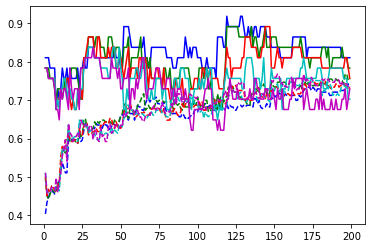

In [517]:
color_error0 = ['b','g' ,'r','c','m']
color_error1 =['b','g' ,'r','c','m']
h = 0
range_of_valid = range(1,200)
e0 = np.zeros(len(range_of_valid))
e1 = np.zeros(len(range_of_valid))

print(e0)
for cte in [0.01,0.1,1,10,100]:
    f = 0
    for i in range_of_valid:
        print('|||',end='')
        arg = J(X,y,i)
        X_new = X[:,arg]
        x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size=0.3, random_state=0)

        scaler = preprocessing.StandardScaler().fit(x_train)

        Xtrain2 = scaler.transform(x_train)
        Xtest2 = scaler.transform(x_test)
        clf = svm.SVC(C = cte, kernel = 'linear', degree = 3, class_weight={0:1,1:5})
        clf.fit(Xtrain2,y_train)
        yhat_test = clf.predict(Xtest2)
        c = confusion_matrix(y_test,yhat_test)
        e0[f] = c[1,1]/(c[1,1]+c[1,0])
        e1[f] = c[0,0]/(c[0,0]+c[0,1])
        f = f +1
    plt.plot(range_of_valid,e0,color=color_error0[h])
    plt.plot(range_of_valid,e1,'--',color=color_error1[h])
    print('\n')
    h = h +1
plt.show()

1 -2 -3 -4 -5 -6 -7 -8 -9 -10 -11 -12 -13 -14 -15 -16 -17 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -

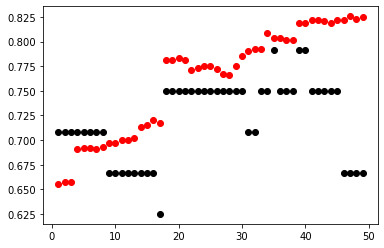

In [8]:
for i in range(1,50):
    print(i,'-',end='')
    arg = J(X,y,i)
    X_new = X[:,arg]
    x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size=0.3, random_state=0)

    scaler = preprocessing.StandardScaler().fit(x_train)

    Xtrain2 = scaler.transform(x_train)
    Xtest2 = scaler.transform(x_test)

    logistic = LogisticRegression(solver='newton-cg',class_weight={0:1,1:35})
    logistic.fit(Xtrain2,y_train)
    yhat_test = logistic.predict(Xtest2)
    c = confusion_matrix(y_test,yhat_test)
    plt.plot(i,c[1,1]/(c[1,1]+c[1,0]),'o',color='black')
    plt.plot(i,c[0,0]/(c[0,0]+c[0,1]),'o',color='red')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
for i in range(1,50):
    print(i,'-',end='')
    arg = J(X,y,i)
    X_new = X[:,arg]
    x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size=0.3, random_state=0)

    scaler = preprocessing.StandardScaler().fit(x_train)

    Xtrain2 = scaler.transform(x_train)
    Xtest2 = scaler.transform(x_test)
    X, y = make_classification(n_samples=1000, n_features=4,  n_informative=2, n_redundant=0,random_state=0, shuffle=False)
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    logistic.fit(Xtrain2,y_train)
    yhat_test = logistic.predict(Xtest2)
    c = confusion_matrix(y_test,yhat_test)
    plt.plot(i,c[1,1]/(c[1,1]+c[1,0]),'o',color='black')
    plt.plot(i,c[0,0]/(c[0,0]+c[0,1]),'o',color='red')
plt.show()

In [421]:
#### logestic final
x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size=0.01, random_state=0)
#oversample = RandomOverSampler(sampling_strategy='minority')
#x_train, y_train = oversample.fit_resample(x_train, y_train)
scaler = preprocessing.StandardScaler().fit(x_train)

Xtrain2 = scaler.transform(x_train)


logistic = LogisticRegression(solver='newton-cg',class_weight={0:1,1:35})
logistic.fit(Xtrain2,y_train)
#class_weight={0:75,1:2625},

yhat_train = logistic.predict(Xtrain2)

err_train = 100*(yhat_train  != y_train).mean()



print('training error = ' , err_train , '%')
print(confusion_matrix(y_train,yhat_train))

training error =  18.2566404788627 %
[[2122  476]
 [  12   63]]


In [21]:
mat = loadmat('TestData2')
df = pd.DataFrame(np.array(mat['TestData2']))
df

,0,1,2,3,4,5,6,7,8,9,...,63820,63821,63822,63823,63824,63825,63826,63827,63828,63829
0,0.000000,0.003906,0.007812,0.011719,0.015625,0.019531,0.023438,0.027344,0.031250,0.035156,...,249.296875,249.300781,249.304688,249.308594,249.312500,249.316406,249.320312,249.324219,249.328125,249.332031
1,2.349953,13.533206,27.503464,40.047524,48.733257,51.678132,49.968081,45.782649,41.687333,39.230701,...,71.828605,78.352958,69.306383,52.379036,49.813900,64.447019,73.955138,64.701503,53.105612,59.220246
2,9.597634,13.806415,4.046789,1.676439,15.680456,27.034150,18.254126,-0.271170,-3.857240,10.600554,...,54.184084,45.780963,36.877903,37.625870,41.609819,39.700635,36.344468,39.884852,46.022982,44.377365
3,-4.983213,-1.559760,13.285745,23.355423,20.307052,17.009077,25.454507,33.370494,24.321880,9.155706,...,26.739156,23.573053,27.835940,29.819718,25.105066,20.123654,21.366515,26.711613,29.602210,28.343769
4,-2.155819,-1.245441,2.758899,6.682938,7.759729,6.194162,3.883230,1.091960,-1.202092,-0.968766,...,40.058791,31.595212,21.898482,23.490064,33.211021,35.561022,26.722357,22.025204,31.794209,43.722895
5,5.762399,-5.483164,-2.479567,16.918112,27.836339,16.118988,-0.638156,-1.635556,8.904775,12.353653,...,33.137643,34.790205,30.510565,22.291307,19.682786,23.585815,25.941595,23.504053,21.549640,23.499637
6,-0.398760,-4.272923,-6.679005,-2.709987,2.910976,3.651719,2.178861,2.321479,1.719876,-1.915905,...,-2.311535,1.245010,6.177455,5.646255,4.501620,10.071746,18.303908,18.879429,11.151502,6.412378
7,0.386289,11.833356,13.039865,7.017187,8.637674,20.115928,26.423143,17.724294,4.968199,3.918723,...,8.345420,8.867888,2.899704,-0.919681,3.420384,9.727233,10.201405,8.023057,10.014522,14.711153
8,2.044679,2.983291,10.266844,22.376539,28.413394,26.994589,25.802090,26.562616,24.690747,19.155785,...,-27.714601,-22.912033,-8.883473,-0.779460,-2.427028,-3.557490,3.013917,11.236473,12.524032,9.250569
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
X = fe(df)
X_new = X[:,arg]
#X_new = X
X_new

array([[ 17.85046841,   6.01867087, -12.3105624 , ...,   4.22501278,
          7.38104916,   8.2067251 ],
       [ -0.38831016,  -1.06551447,  -6.07698528, ..., -18.60953623,
        -10.00215371, -20.23151998],
       [ 11.4660748 ,  11.03721788,  15.6463277 , ...,  25.7349218 ,
         15.49863354,  29.1565266 ],
       ...,
       [ 43.36424849,  37.7546443 ,  37.67076608, ...,  38.52352834,
         43.38928353,  57.92110474],
       [ 18.87869157,  22.46069923,  33.57901098, ...,  28.10454451,
         25.01581628,  37.56176733],
       [ 22.45267747,  12.24417585,  15.51869933, ...,   4.73210387,
         16.87163944,  15.27615339]])

In [23]:
Xtest2 = scaler.transform(X_new)
yhat_test = logistic.predict(Xtest2)
yhat_test

array([0., 0., 0., ..., 1., 1., 0.])

In [536]:
Xtest2 = scaler.transform(X_new)
yhat_test = clf.predict(Xtest2)
yhat_test

array([1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0.

In [537]:
ry = df.iloc[9,np.argwhere(df.to_numpy()[9] != 0).reshape(-1,4)[:,0]].to_numpy()
#for i in range(5):
   # print(pd.DataFrame(np.array(np.unique(ry[i*180:(i+1)*180][yhat_test[i*180:(i+1)*180]==1], return_counts=True)).T).sort_values(by=[1],ascending=False).iloc[:5,0])
#(yhat_test==1).sum()


dict = np.array(['A','B','C','D','E','F',
                     'G','H','I','J','K','L',
                     'M','N','O','P','Q','R',
                     'S','T','U','V','W','X',
                     'Y','Z','0','1','2','3',
                     '4','5','6','7','8','9']).reshape((6,6))
for i in range(5):
    temp = ry[i*180:(i+1)*180][yhat_test[i*180:(i+1)*180]==1]
    temp1 = np.unique(temp[temp<7],return_counts=True)
    temp2 = np.unique(temp[temp>=7],return_counts=True)
    row = int(temp2[0][np.argsort(temp2[1])][-1])-7
    column = int(temp1[0][np.argsort(temp1[1])][-1])-1
    print(dict[row,column],end='')

XGTI9

In [24]:
ry = df.iloc[9,np.argwhere(df.to_numpy()[9] != 0).reshape(-1,4)[:,0]].to_numpy()
for i in range(5):
    print(pd.DataFrame(np.array(np.unique(ry[i*540:(i+1)*540][yhat_test[i*540:(i+1)*540]==1], return_counts=True)).T).sort_values(by=[1],ascending=False).iloc[0,0])
#(yhat_test==1).sum()

23.0
21.0
11.0
1.0
19.0


In [195]:
print(hilphase([1000,2,3],[2,3,4]))

-0.8462761871500638


In [196]:
for i in range(8):
            print(i)

0
1
2
3
4
5
6
7


In [373]:
moment(np.array([[1, 2, 3, 4, 5],[1, 2, 3, 4, 5]]), moment=4,axis = 1)

array([6.8, 6.8])